In [1]:
import json
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

with open('speaker_data.json', "r") as file:
    data = json.load(file)

X = np.array(data["mfcc"])
y = np.array(data["labels"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,random_state=0) 

In [2]:
nsamples, nx, ny = X_train.shape
X_train = X_train.reshape((nsamples,nx*ny))

nsamples, nx, ny = X_test.shape
X_test = X_test.reshape((nsamples,nx*ny))

In [3]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [4]:
scaler = MinMaxScaler()
scaler.fit(X_train)
train_sc = scaler.transform(X_train)
test_sc = scaler.transform(X_test)

pca = PCA(n_components =20, whiten = False)
pca.fit(train_sc)

train_pca = pca.transform(train_sc)
test_pca = pca.transform(test_sc)

In [5]:
knn = KNeighborsClassifier(n_neighbors=5, weights='distance')
knn.fit(train_pca, y_train)

preds = knn.predict(train_pca)
acc = accuracy_score(y_train, preds)
print('Train Accuracy: ',acc)
preds = knn.predict(test_pca)
acc = accuracy_score(y_test, preds)
print('Test Accuracy: ',acc)

Train Accuracy:  1.0
Test Accuracy:  0.9404079456072524


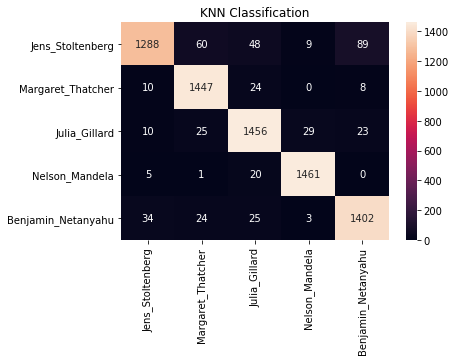

In [6]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
labelNames = ['Jens_Stoltenberg','Margaret_Thatcher','Julia_Gillard','Nelson_Mandela','Benjamin_Netanyahu']
matrix = confusion_matrix(y_test, preds)
sns.heatmap(matrix,annot=True,fmt='d',yticklabels=labelNames,xticklabels=labelNames)
plt.title('KNN Classification');

In [7]:
svm = SVC(C=8.0)
svm.fit(train_pca, y_train)

preds = svm.predict(train_pca)
acc = accuracy_score(y_train, preds)
print('Train Accuracy: ',acc)
preds = svm.predict(test_pca)
acc = accuracy_score(y_test, preds)
print('Test Accuracy: ',acc)

Train Accuracy:  0.988520049178628
Test Accuracy:  0.9676043194240768


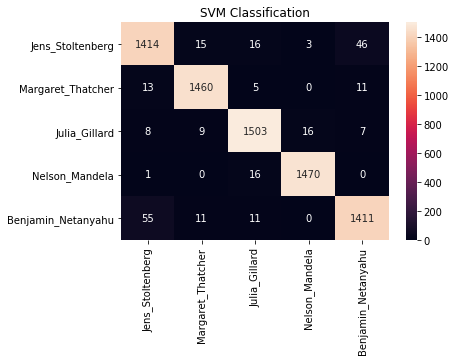

In [8]:
matrix = confusion_matrix(y_test, preds)
sns.heatmap(matrix,annot=True,fmt='d',yticklabels=labelNames,xticklabels=labelNames)
plt.title('SVM Classification');

In [9]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
rf = RandomForestClassifier()
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 0)

In [10]:
grid_search.fit(train_pca, y_train)
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 90,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 1000}

In [11]:
rf = RandomForestClassifier(
    bootstrap= True,
    max_depth= 90,
    max_features= 3,
    min_samples_leaf= 3,
    min_samples_split= 8,
    n_estimators= 1000)

rf.fit(train_pca, y_train)

preds = rf.predict(train_pca)
acc = accuracy_score(y_train, preds)
print('Train Accuracy: ',acc)
preds = rf.predict(test_pca)
acc = accuracy_score(y_test, preds)
print('Test Accuracy: ',acc)

Train Accuracy:  0.9922380719607756
Test Accuracy:  0.9204106119184109


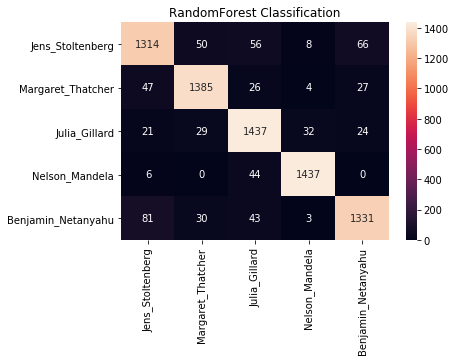

In [12]:
matrix = confusion_matrix(y_test, preds)
sns.heatmap(matrix,annot=True,fmt='d',yticklabels=labelNames,xticklabels=labelNames)
plt.title('RandomForest Classification');